# Develop an image caption generator model using Tensorflow-keras

In this assignment, you will have to train a caption generator model for images. It requires a CNN model to extract the content of images and an RNN model to learn the corresponding captions of the images. These two features are finally merged and trained using dense layers.

The below research papers are for your reference-
1. [Where to put the Image in an Image Caption Generator](https://arxiv.org/abs/1703.09137)
2. [Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics](https://www.ijcai.org/Proceedings/15/Papers/593.pdf) 

This notebook is divided into six parts. Total :

1. Download photo and caption dataset 
2. Prepare photo data 
3. Prepare text data 
4. Develop deep learning model with progressive data loading 
5. Evaluate model 
6. Generate new captions

In [ ]:
from os import chdir
chdir("C:/Users/dlassignment/Documents/")

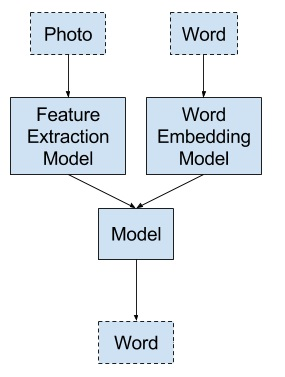

In [ ]:
from IPython.display import Image
Image(filename='Model-Generate-Word-From-Word.jpg')

# 1. Download photo and caption dataset

**Didn't use the following lines. Downloaded the dataset seperately.**

https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

# 2. Prepare photo data

In [ ]:
from os import listdir
from tqdm import tqdm
from pickle import dump
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential

# You need to import the following functions from tensorflow.keras library
# VGG16, load_img, img_to_array, preprocess_input, Model

In [ ]:
# function to extract features from each photo in the directory
def extract_features(directory):
    # load the VGG16 model
    model = Sequential()
    vgg_16 = VGG16()

    # Print the model summary to understand the model
    print(vgg_16.summary())

    # re-structure the model by removing the last layer
    #####

    for layer in vgg_16.layers[:-1]: 
        model.add(layer)

    # summarize
    print(model.summary())

    # extract features from each photo in a dictionary
    features = dict()

    # iterate over all the files of the dataset directory
    for name in listdir(directory):

        filename = directory + '/' + name
        # load the image from filename with target size of (224,224)
        image = load_img(filename,  target_size=(224, 224))

        # convert the image pixels to a numpy array
        image = img_to_array(image)

        # reshape data for the model (1, 3, 224, 224)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

        # preprocess the image for the VGG model	
        image = preprocess_input(image)

        # get features (output of the model for the image)
        feature = model.predict(image, verbose=0)

        # get image id
        image_id = name.split('.')[0]

        # store feature in the features dictionary with image_id as key and feature as value
        features[image_id] = feature

    return features

# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features2.pkl', 'wb'))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

KeyboardInterrupt: 

In [ ]:
# REFERENCE CODE
# You can reference this output to understand the feature dictionary variable

i = 0
for key, value in features.items():
    print("key: ", key, "value: ", value)
    i += 1
    if i==9:
        break

print(value.shape)
print(len(features))

key:  1000268201_693b08cb0e value:  [[2.5076475 0.        0.        ... 0.        0.        0.       ]]
key:  1001773457_577c3a7d70 value:  [[0.         0.         0.49410784 ... 0.         0.         0.        ]]
key:  1002674143_1b742ab4b8 value:  [[1.4937091 0.        0.5356837 ... 2.315413  3.7418406 0.       ]]
key:  1003163366_44323f5815 value:  [[0. 0. 0. ... 0. 0. 0.]]
key:  1007129816_e794419615 value:  [[0.         0.09227684 0.         ... 0.         0.         0.06528944]]
key:  1007320043_627395c3d8 value:  [[0.      0.      0.      ... 0.      3.33864 0.     ]]
key:  1009434119_febe49276a value:  [[2.0962934 2.11932   3.5624332 ... 0.6426386 2.7146523 0.       ]]
key:  1012212859_01547e3f17 value:  [[0.         0.         0.98737097 ... 0.         1.4932513  0.8612852 ]]
key:  1015118661_980735411b value:  [[1.4410391 0.2829215 0.        ... 0.        2.4591997 0.       ]]
(1, 4096)
8091


# 3. Prepare Text Data

In [ ]:
 = load_doc(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 6\In-Class Demo\Flickr8k_text\Flickr8k.token.txt")

In [ ]:
filename = doc.split("\n")[0].split("\t")[0].split(".")[0]
descript = doc.split("\n")[0].split("\t")[1]

In [ ]:
print(filename)
print(descript)

1000268201_693b08cb0e
A child in a pink dress is climbing up a set of stairs in an entry way .


In [ ]:
import string

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
doc

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a painted rainbow with her hands in 

In [ ]:
line1 = doc.split('\n')[0]
line1 = line1.split()
img_id = line1[0]
img_desc = line1[1:]
img_desc = ' '.join(img_desc)

print(img_id[:-2])
print(img_desc)

1000268201_693b08cb0e.jpg
A child in a pink dress is climbing up a set of stairs in an entry way .


In [ ]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0][:-2], tokens[1:]

        # remove filename from image id
        image_id = image_id.split('.')[0]

        # convert description tokens back to string
        image_desc = ' '.join(image_desc)

        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()

        # store description
        mapping[image_id].append(image_desc)

    return mapping

In [ ]:
# We will clean the text in the following ways in order to reduce the size of the vocabulary of words we will need to work with:

# 1. Convert all words to lowercase.
# 2. Remove all punctuation.
# 3. Remove all words that are one character or less in length (e.g. ‘a’).
# 4. Remove all words with numbers in them.

def clean_descriptions(descriptions):

    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]

            # tokenize desc using split 
            desc = desc.split()

            # convert all the words in desc to lower case
            desc = [word.lower() for word in desc]

            # remove punctuation from each token using translate function 
            # pass the "table" variable to this function
            desc = [word.translate(table) for word in desc ]

            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]

            # remove tokens with numbers in them using isalpha
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

In [ ]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):

    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

In [ ]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
# Use the above functions in the code below-

filename = 'Flickr8k_text/Flickr8k.token.txt'

# load descriptions (pass the filename)
doc = load_doc(filename)

# parse descriptions (pass doc)
descriptions = load_descriptions(doc) 
print('Loaded: %d ' % len(descriptions))

# clean the descriptions
#####
clean_descriptions(descriptions)

# summarize descriptions to a vocabulary of words
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))

# save to file
save_descriptions(descriptions, 'descriptions2.txt')

# You should get the following output for the above code

Loaded: 8092 
Vocabulary Size: 8763


# 4. Develop Deep Learning Model

In [ ]:
from pickle import load, dump

In [ ]:
from numpy import array
from pickle import load, dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Add
from tensorflow.keras.callbacks import ModelCheckpoint
# You need to import the following functions from tensorflow.keras library
# Tokenizer, pad_sequences, to_categorical, plot_model, Model, Input, Dense, LSTM, Embedding, Dropout, add, ModelCheckpoint

#####

In [ ]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

    # fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [ ]:
# REFERENCE CODE
# X1, X2 (text sequence), y (word)
# photo	    startseq, little
# photo	    startseq  little, girl
# photo	    startseq  little  girl, running
# photo	    startseq  little  girl  running, in
# photo	    startseq  little  girl  running  in, field
# photo	    startseq, little, girl, running, in, field,     endseq

# You need to create the sequences in abovee format for your data

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)
    return array(X1), array(X2), array(y)

**You need to build a model with the following layers.
We have explained the inputs and outputs in the comments in the following cells.**

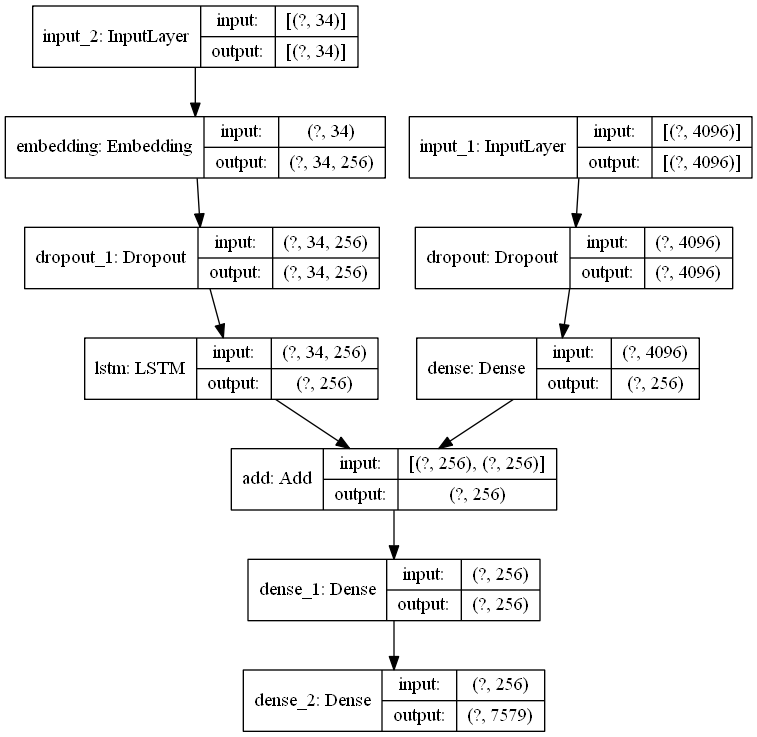

In [ ]:
from IPython.display import Image
Image('model.png')

In [ ]:
from tensorflow.keras.models import load_model

# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    # define an input of shape (4096,)
    inputs1 = Input(shape=(4096,))
    # Add a dropout layer of 0.5
    fe1 = Dropout(0.5)(inputs1)
    # Add a dense layer of 256 units with relu activation
    fe2 = Dense(256, activation='relu')(fe1)

    # sequence model
    # Define input of shape (max_length,)
    inputs2 = Input(shape=(max_length,))
    # Define an 256 dimension embedding layer with the vocab_size and parameter mark_zero=True
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    # Add a dropout layer of 0.5
    se2 = Dropout(0.5)(se1)
    # Add LSTM Layer
    se3 = LSTM(256)(se2)

    # decoder model
    # Add the outputs of feature extractor model and sequence model
    decoder1 = Add()([fe2, se3])
    # Feed it to a dense layer of 256 units with relu activation
    decoder2 = Dense(256, activation='relu')(decoder1)
    # Add a dense layer with no. of units=vocab_size, and softmax activation
    outputs = Dense(vocab_size, activation="softmax")(decoder2)

    # tie it together and create a model instance which takes input as [image, seq] and gives output as [word]  
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)

    # compile model with categorical crossentropy loss and adam optimizer
    model.compile(loss="categorical_crossentropy", optimizer="adam")

    # summarize model
    model.summary()

    # check if this is same as image provided 
    try:
        plot_model(model, to_file='model.png', show_shapes=True)
    except:
        pass
    return model

# data generator, intended to be used in a call to model.fit()
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            # retrieve the photo feature
            photo = photos[key][0]
            # create the sequences
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
            yield [in_img, in_seq], out_word

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# load clean descriptions for train
train_descriptions = load_clean_descriptions('descriptions.txt',train)
print('Descriptions: train=%d' % len(train_descriptions))

# load photo features for train using pkl file
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

# prepare tokenizer for train descriptions
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length of train description
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# define the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 5
steps = len(train_descriptions)
for i in range(epochs):
    # create the data generator
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
    # fit for one epoch and verbose 1
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    # save model
model.save('model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 256)      1940224     input_5[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_4[0][0]     

KeyboardInterrupt: 

** <span style="color:orange;"> NOTE: </span> WARNING:tensorflow:sample_weight modes were coerced from**

The above WARNING is generated due to a bug. This is fixed in tensorflow 2.2

# 5. Evaluate Model

In [ ]:
from numpy import argmax
from nltk.translate.bleu_score import corpus_bleu
from tensorflow.keras.models import load_model
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence using texts_to_sequences (consider first element)
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad sequence for maxlength
        sequence =  pad_sequences([sequence], maxlen=max_length)
        # predict next word using both photo and sequence
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat =  argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    # assign empty lists
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# load clean descriptions for train
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer for train descriptions
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length =  max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model_4.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000


NameError: name 'load_model' is not defined

# 6. Generate new captions

In [ ]:
from numpy import argmax
from tensorflow.keras.models import load_model

# extract features from each image in the directory
def extract_features(filename):
    model = Sequential()
    #load model
    vgg_16 = VGG16()
    # re-structure the model by removing the last layer
    for layer in vgg_16.layers[:-1]: # this is where I changed your code
        model.add(layer)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model_4.h5')
# load and prepare your own image to generate the caption
photo = extract_features('google_img.jpg')   
# generate description
description =  generate_desc(model, tokenizer, photo, max_length)

In [ ]:
from IPython.display import Image

startseq two boys are playing soccer in the grass endseq


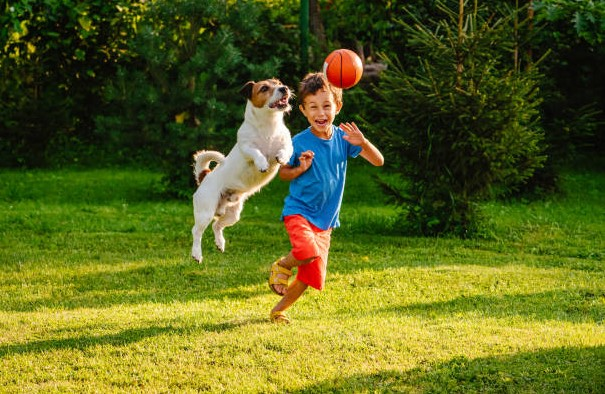

In [ ]:
print(description)
# provide your image file name 
Image(filename='google_img.jpg')


## Appendix: Artefacts of the Model

All the artefacts are available in the following drive. They can be accessed incase of any clarification.

https://drive.google.com/drive/folders/1t3RDhLmxsN1A1vJwPvlwLv7PfmzdhM6r?usp=sharing